**Problem Statement**    
   A traveller wants to plan an international vacation but prefers destinations that fall within a comfortable temperature range (for example, 18°C–28°C). Weather conditions vary significantly across countries and seasons, making it difficult to manually evaluate which country is suitable at a given time .    
Time-and-date websites provide historical and current weather data (date-wise temperature records), but this data i s:    
Spread across multiple p age    s
Time-depende    nt
Not directly comparable across countres
 countries


**Core Problem**
    
The traveler lacks a data-driven method to    :    

Compare temperatures across multiple countries for the same date ra    n    ge

Identify countries with consistently comfortable we    a    ther

Avoid destinations with extreme heat or cold


**Business Problem Statement**

Travel businesses do not effectively utilize historical temperature data to recommend destinations aligned with customer climate preferences, resulting in:

Poor customer satisfaction

Increased trip cancellations

Lower repeat bookings

**Objective**

To analyze date-wise temperature data from a time-and-date website and recommend ideal vacation countries based on the traveler’s temperature preference


**Business Problem and  Business Understanding**

                                                             ↓

                                           **Data Collection and Data Understanding**

                                                             ↓

                                              **Data Preprocessing(Cleaning)**

                                                             ↓

                                             **Exploratory Data Analysis (EDA)**

                                                             ↓

                                              **Evaluation(Hypothesis Testing)**

                                                             ↓

                                                         **Conclusion**


# Data Collection  -- (Webscraping )

In [31]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
import re 

In [32]:
options = Options()
options.add_argument("--start-maximized")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)


In [33]:
url="https://www.timeanddate.com/weather/?low=4&sort=0"
driver.get(url)

In [34]:
driver.find_elements(By.CLASS_NAME,"tb-scroll")

[<selenium.webdriver.remote.webelement.WebElement (session="c5780a2c4fb897ae2d8a919e0b8e833f", element="f.61DEC6F6139353823968161D439E24A9.d.5D09DF9132A9853D3E370A0C6668FA60.e.46")>]

In [35]:
driver.find_elements(By.CLASS_NAME,"tb-scroll")[0].text

"Local Time and Weather Around the World\nSort By:\nCity\nCountry\nTime\nTemperature\nCities Shown:\nCapitals (215)\nMost Popular (143)\nPopular (358)\nSomewhat Popular (472)\nAbidjan Wed 11:26 29 °C Hamilton Wed 07:26 18 °C Palma Wed 12:26 16 °C\nAbu Dhabi Wed 15:26 22 °C Hanoi Wed 18:26 13 °C Panama Wed 06:26 24 °C\nAcapulco Wed 05:26 23 °C Happy Valley-Goose Bay Wed 07:26 -23 °C Papeete Wed 01:26 25 °C\nAccra Wed 11:26 29 °C Harare Wed 13:26 20 °C Paramaribo Wed 08:26 24 °C\nAdak Wed 01:26 3 °C Hartford Wed 06:26 -14 °C Paris Wed 12:26 10 °C\nAddis Ababa Wed 14:26 22 °C Havana Wed 06:26 19 °C Patna Wed 16:56 23 °C\nAdelaide * Wed 21:56 17 °C Helsinki Wed 13:26 -4 °C Pensacola Wed 05:26 7 °C\nAden Wed 14:26 28 °C Hermosillo Wed 04:26 14 °C Perm Wed 16:26 -21 °C\nAguascalientes Wed 05:26 10 °C Ho Chi Minh Wed 18:26 27 °C Perth Wed 19:26 36 °C\nAhmedgarh Wed 16:56 23 °C Hobart * Wed 22:26 12 °C Petropavlovsk-Kamchatsky Wed 23:26 -12 °C\nAlbuquerque Wed 04:26 -2 °C Hong Kong Wed 19:26 1

In [36]:
Cities=[]
#driver.find_elements(By.CLASS_NAME,"zebra.fw.tb-theme")[0].text
for tag in driver.find_elements(By.CLASS_NAME, "tb-scroll"):
    txt = tag.text.replace("\n", "")   #  IMPORTANT FIX
    
    a = re.findall(r'([A-Za-z() ]+?)\s+(Sun|Mon|Tue|Wed|Thu|Fri|Sat)', txt)
    
    for city, _ in a:
        city = city.strip()

        #  remove unwanted words
        if "Locations" in city:
            continue

        #  remove leading single letters like 'C'
        city = re.sub(r'^[\)\s]*C?\s*', '', city)
        if len(city) <= 2:
            continue

        Cities.append(city)


In [37]:
print(Cities)
len(Cities)

['Abidjan', 'Hamilton', 'Palma', 'Abu Dhabi', 'Hanoi', 'Panama', 'Acapulco', 'Goose Bay', 'Papeete', 'Accra', 'Harare', 'Paramaribo', 'Adak', 'Hartford', 'Paris', 'Addis Ababa', 'Havana', 'Patna', 'Helsinki', 'Pensacola', 'Aden', 'Hermosillo', 'Perm', 'Aguascalientes', 'Ho Chi Minh', 'Perth', 'Ahmedgarh', 'Kamchatsky', 'Albuquerque', 'Hong Kong', 'Pevek', 'Alert', 'Honiara', 'Philadelphia', 'Algiers', 'Honolulu', 'Phoenix', 'Alice Springs', 'Houston', 'Pituffik', 'Almaty', 'Hovd', 'Podgorica', 'Alofi', 'Indianapolis', 'Pond Inlet', 'Amman', 'Indore', 'Ponta Delgada', 'Amsterdam', 'Inuvik', 'Pontianak', 'Anadyr', 'Irkutsk', 'Francais', 'Anchorage', 'Islamabad', 'Port Louis', 'Ankara', 'Istanbul', 'Port of Spain', 'Antananarivo', 'Ittoqqortoormiit', 'Port Vila', 'Apia', 'Izhevsk', 'Portland', 'Aqtobe', 'Jackson', 'Porto Novo', 'Ashgabat', 'Jakarta', 'Prague', 'Astana', 'Jamestown', 'Praia', 'Asuncion', 'Jayapura', 'Pretoria', 'Athens', 'Jerusalem', 'Pristina', 'Atlanta', 'Johannesburg', 

406

In [ ]:
Cities

In [38]:
Day=[]
for tag in driver.find_elements(By.CLASS_NAME,"tb-scroll"):
    txt=tag.text
    a = re.findall(r'\b(Sun|Mon|Tue|Wed|Thu|Fri|Sat)\b', txt)
    print(a)
    Day.extend(a)
print(Day)
print(len(Day))

['Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Thu', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Thu', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Thu', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed', 'Wed'

In [ ]:
len(Day)

In [39]:
time=[]
for tag in driver.find_elements(By.CLASS_NAME,"tb-scroll"):
    txt=tag.text
    a = re.findall(r'\d{1,2}:\d{2}', txt)
    print(a)
    time.extend(a)
print(time)

['11:26', '07:26', '12:26', '15:26', '18:26', '06:26', '05:26', '07:26', '01:26', '11:26', '13:26', '08:26', '01:26', '06:26', '12:26', '14:26', '06:26', '16:56', '21:56', '13:26', '05:26', '14:26', '04:26', '16:26', '05:26', '18:26', '19:26', '16:56', '22:26', '23:26', '04:26', '19:26', '23:26', '06:26', '22:26', '06:26', '12:26', '01:26', '04:26', '20:56', '05:26', '07:26', '16:26', '18:26', '12:26', '00:26', '06:26', '06:26', '14:26', '16:56', '10:26', '12:26', '04:26', '18:26', '23:26', '19:26', '16:26', '02:26', '16:26', '15:26', '14:26', '14:26', '07:26', '14:26', '09:26', '22:26', '00:26', '15:26', '03:26', '16:26', '05:26', '12:26', '16:26', '18:26', '12:26', '16:26', '11:26', '10:26', '08:26', '20:26', '13:26', '13:26', '13:26', '12:26', '06:26', '13:26', '06:26', '00:26', '02:26', '16:56', '06:26', '13:26', '08:26', '05:26', '14:26', '20:26', '05:26', '09:26', '06:26', '15:26', '05:26', '06:26', '19:26', '16:26', '12:26', '06:26', '17:11', '06:26', '11:26', '14:26', '04:26', 

In [ ]:
len(time)

In [40]:
temperature=[]
for tag in driver.find_elements(By.CLASS_NAME,"tb-scroll"):
    txt=tag.text
    a = re.findall(r'-?\d+(?=\s*°\s*C)', txt)
    temperature.extend(a)
print(temperature)

['29', '18', '16', '22', '13', '24', '23', '-23', '25', '29', '20', '24', '3', '-14', '10', '22', '19', '23', '17', '-4', '7', '28', '14', '-21', '10', '27', '36', '23', '12', '-12', '-2', '14', '-25', '-27', '26', '-8', '15', '22', '12', '32', '16', '-14', '-6', '-22', '6', '27', '-3', '-34', '8', '26', '16', '6', '-19', '28', '-1', '-22', '10', '-8', '20', '26', '-3', '8', '23', '25', '0', '28', '26', '-16', '1', '-14', '7', '29', '-3', '27', '-6', '-12', '21', '19', '24', '29', '20', '11', '9', '-1', '-6', '15', '-13', '23', '-6', '28', '-15', '-12', '5', '13', '29', '-11', '-27', '-19', '-16', '4', '1', '9', '30', '25', '15', '-12', '16', '-3', '23', '-8', '-6', '27', '-10', '27', '24', '-26', '29', '31', '26', '-10', '32', '24', '-27', '21', '26', '7', '14', '27', '-8', '24', '25', '-15', '25', '-7', '22', '-3', '3', '21', '14', '26', '12', '26', '-22', '7', '7', '-21', '23', '-3', '26', '-9', '20', '-27', '6', '-2', '11', '30', '26', '-4', '25', '0', '3', '-14', '1', '5', '25', '

# making all columns as equal using zip

In [ ]:
import pandas as pd

In [ ]:
from itertools import zip_longest

In [41]:
data=list(zip(Cities,temperature,Day,time))
data

[('Abidjan', '29', 'Wed', '11:26'),
 ('Hamilton', '18', 'Wed', '07:26'),
 ('Palma', '16', 'Wed', '12:26'),
 ('Abu Dhabi', '22', 'Wed', '15:26'),
 ('Hanoi', '13', 'Wed', '18:26'),
 ('Panama', '24', 'Wed', '06:26'),
 ('Acapulco', '23', 'Wed', '05:26'),
 ('Goose Bay', '-23', 'Wed', '07:26'),
 ('Papeete', '25', 'Wed', '01:26'),
 ('Accra', '29', 'Wed', '11:26'),
 ('Harare', '20', 'Wed', '13:26'),
 ('Paramaribo', '24', 'Wed', '08:26'),
 ('Adak', '3', 'Wed', '01:26'),
 ('Hartford', '-14', 'Wed', '06:26'),
 ('Paris', '10', 'Wed', '12:26'),
 ('Addis Ababa', '22', 'Wed', '14:26'),
 ('Havana', '19', 'Wed', '06:26'),
 ('Patna', '23', 'Wed', '16:56'),
 ('Helsinki', '17', 'Wed', '21:56'),
 ('Pensacola', '-4', 'Wed', '13:26'),
 ('Aden', '7', 'Wed', '05:26'),
 ('Hermosillo', '28', 'Wed', '14:26'),
 ('Perm', '14', 'Wed', '04:26'),
 ('Aguascalientes', '-21', 'Wed', '16:26'),
 ('Ho Chi Minh', '10', 'Wed', '05:26'),
 ('Perth', '27', 'Wed', '18:26'),
 ('Ahmedgarh', '36', 'Wed', '19:26'),
 ('Kamchatsky', '2

# Making Dataset Using Pandas 

In [42]:
df=pd.DataFrame(data,columns=["Cities","Temperature","Day","Time"])

In [ ]:
df[df["Cities"]=="Chibougamau"]

In [43]:
df

,Cities,Temperature,Day,Time
0,Abidjan,29,Wed,11:26
1,Hamilton,18,Wed,07:26
2,Palma,16,Wed,12:26
3,Abu Dhabi,22,Wed,15:26
4,Hanoi,13,Wed,18:26
...,...,...,...,...
401,Zagreb,26,Wed,11:26
402,Ottawa,24,Wed,06:26
403,rich,-4,Wed,09:26
404,Halifax,30,Wed,17:56


# replace day name for adding date column

In [44]:
day_map = {
    "Mon": "Monday",
    "Tue": "Tuesday",
    "Wed": "Wednesday",
    "Thu": "Thursday",
    "Fri": "Friday",
    "Sat": "Saturday",
    "Sun": "Sunday"
}

df["Day"] = df["Day"].replace(day_map)


In [45]:
df

,Cities,Temperature,Day,Time
0,Abidjan,29,Wednesday,11:26
1,Hamilton,18,Wednesday,07:26
2,Palma,16,Wednesday,12:26
3,Abu Dhabi,22,Wednesday,15:26
4,Hanoi,13,Wednesday,18:26
...,...,...,...,...
401,Zagreb,26,Wednesday,11:26
402,Ottawa,24,Wednesday,06:26
403,rich,-4,Wednesday,09:26
404,Halifax,30,Wednesday,17:56


In [46]:
weekday_map = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
}


In [47]:
reference_date = pd.Timestamp("2026-01-13")
reference_weekday = reference_date.weekday()  # Tuesday = 1
reference_weekday

1

# Added the Date Column to dataset

In [48]:
df["date"] = df["Day"].map(
    lambda x: reference_date + 
    pd.Timedelta(days=(weekday_map[x] - reference_weekday) % 7)
)


In [ ]:
df["date"]

In [ ]:
df_new.isna().sum()

In [ ]:
df_final = pd.concat([df_old, df_new], ignore_index=True)


In [ ]:
df=pd.read_csv("World_Weather.csv")
df

# Column Cleaning for feature selection

In [ ]:
df["Cities"] = (
    df["Cities"]
    .astype(str)
    .str.strip()                                # remove extra spaces
    .str.replace(r"\(.*?\)", "", regex=True)    # remove text in brackets
    .str.replace(r"[^a-zA-Z\s]", "", regex=True)# remove symbols/numbers
    .str.replace(r"\s+", " ", regex=True)       # normalize spaces
    .str.title()                                # Standardize case
)


In [ ]:
df = df[df["Cities"].str.len() > 2]     # remove very short garbage values
df = df[~df["Cities"].isin(["France"])] # remove country-only rows


In [ ]:
df1=pd.read_csv(r"C:\Users\prash\Downloads\simplemaps_worldcities_basicv1.901\worldcities.csv")
df1

# Adding Country Column to city It is taken from another dataset

In [ ]:
df = df.merge(df1[["city", "country"]],
              left_on="Cities",
              right_on="city",
              how="left").drop(columns="city")


In [ ]:
df

In [ ]:
#df.drop(columns="country_y",inplace=True)

In [ ]:
#df=df.rename(columns={"country_x":"Country"})

# Changed the date column name as Date for all columns are in Camel case

In [ ]:
df=df.rename(columns={"date":"Date","country":"Country"})

In [ ]:
df

In [ ]:
df.head()

# Columns Are Arranged Order Wise For Easy Understanding

In [ ]:
df = df[["Country", "Cities", "Day", "Time", "Date","Temperature"]]


In [ ]:
df

In [ ]:
df.to_csv("Web_World_Weather.csv",index=False)

In [ ]:
df=pd.read_csv("Web_World_Weather.csv")
df

# converting the time data

In [ ]:
df["Time"] = pd.to_datetime(df["Time"])


In [ ]:
df

# Adding Hour Column to dataset

In [ ]:
df["Hour"] = df["Time"].dt.hour
df

In [ ]:
df["Hour"] = pd.to_numeric(df["Hour"], errors="coerce")


In [ ]:
df["Hour"].unique()

# Adding Timeslot column

In [ ]:
df.drop(columns=["Time_Slot"], inplace=True, errors="ignore")


In [ ]:
df["Time_Slot"] = pd.cut(
    df["Hour"],
    bins=[0, 5, 12, 17, 21, 24],
    labels=["Late Night", "Morning", "Afternoon", "Evening", "Night"],
    include_lowest=True,
    right=False
)



In [ ]:
df

# Created a feature Coolest Temperature 

In [ ]:
df["Coolest"] = (df["Temperature"] <= 0).astype(int)
df.to_csv("Weather_data.csv",index=False)
df

In [40]:
import pandas as pd
df=pd.read_csv("f.csv")
df.drop(columns=["date"],inplace=True)


In [41]:
df

,Cities,Temperature,Day,Time
0,Abidjan,28,Sunday,05:19
1,Guayaquil,26,Sunday,00:19
2,Palma,10,Sunday,06:19
3,Abu Dhabi,18,Sunday,09:19
4,Panama,29,Sunday,15:19
...,...,...,...,...
400,Ottawa,1,Sunday,03:19
401,Zagreb,22,Sunday,05:19
402,Guatemala City,2,Sunday,06:19
403,Palikir,-7,Saturday,23:19


# later i saved the dataset to Weather_data.csv

# Loading The Data

In [1]:
import pandas as pd

df=pd.read_csv('Weather_data.csv')
df

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
0,United Arab Emirates,Abu Dhabi,Wednesday,17:29:00,14-01-2026,27,17,Evening,0
1,Nicaragua,Managua,Wednesday,07:29:00,14-01-2026,23,7,Morning,0
2,Ghana,Accra,Wednesday,13:29:00,14-01-2026,31,13,Afternoon,0
3,Bahrain,Manama,Wednesday,16:29:00,14-01-2026,22,16,Afternoon,0
4,Ethiopia,Addis Ababa,Wednesday,16:29:00,14-01-2026,23,16,Afternoon,0
...,...,...,...,...,...,...,...,...,...
5293,Croatia,Zagreb,Saturday,02:00:00,17-01-2026,-23,2,Late Night,1
5294,Guatemala,Guatemala City,Saturday,03:00:00,17-01-2026,23,3,Late Night,0
5295,Spain,Palma,Saturday,08:00:00,17-01-2026,25,8,Morning,0
5296,Mozambique,Palma,Saturday,08:00:00,17-01-2026,25,8,Morning,0


Actions Performed --Dataset contains weather data scraped from timeanddate.com

    --Each row represents one Country-city weather  variant.
    
    --Columns represent Cities, Temperature  and Day ,Time 
    
     Key Columns
    
    Cities – Cities of the Country
    Country - Country
    Temperature – Temperature of the City measured in Celsius
    
    Day – Weekday of the month and year
    
    Time – Time of the City recorded  as per website scraping
    
    Hour -particular hour as per website scraping
    
    Time_Slot- Mornings,Afternoon,Evening,Night 
    
    Date – Date is recorded as per website scraping

In [26]:
df.shape

(5298, 9)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      4673 non-null   object
 1   Cities       5298 non-null   object
 2   Day          5298 non-null   object
 3   Time         5298 non-null   object
 4   Date         5298 non-null   object
 5   Temperature  5298 non-null   int64 
 6   Hour         5298 non-null   int64 
 7   Time_Slot    5298 non-null   object
 8   Coolest      5298 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 372.6+ KB


In [5]:
df.isna().sum()

Country        625
Cities           0
Day              0
Time             0
Date             0
Temperature      0
Hour             0
Time_Slot        0
Coolest          0
dtype: int64

# Changing the Data Type

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      4673 non-null   object
 1   Cities       5298 non-null   object
 2   Day          5298 non-null   object
 3   Time         5298 non-null   object
 4   Date         5298 non-null   object
 5   Temperature  5298 non-null   int64 
 6   Hour         5298 non-null   int64 
 7   Time_Slot    5298 non-null   object
 8   Coolest      5298 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 372.6+ KB


In [29]:
df["Date"]=df["Date"].astype("datetime64[ns]")

In [13]:
#df["Time"]=pd.to_datetime(df["Time"], format="%H:%M:%S").dt.time

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5298 entries, 0 to 5297
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Country      4673 non-null   object        
 1   Cities       5298 non-null   object        
 2   Day          5298 non-null   object        
 3   Time         5298 non-null   object        
 4   Date         5298 non-null   datetime64[ns]
 5   Temperature  5298 non-null   int64         
 6   Hour         5298 non-null   int64         
 7   Time_Slot    5298 non-null   object        
 8   Coolest      5298 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 372.6+ KB


In [14]:
df

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
0,United Arab Emirates,Abu Dhabi,Wednesday,19-01-2026 17.29,2026-01-14,27,17,Evening,0
1,Nicaragua,Managua,Wednesday,19-01-2026 7.29,2026-01-14,23,7,Morning,0
2,Ghana,Accra,Wednesday,19-01-2026 13.29,2026-01-14,31,13,Afternoon,0
3,Bahrain,Manama,Wednesday,19-01-2026 16.29,2026-01-14,22,16,Afternoon,0
4,Ethiopia,Addis Ababa,Wednesday,19-01-2026 16.29,2026-01-14,23,16,Afternoon,0
...,...,...,...,...,...,...,...,...,...
5293,Croatia,Zagreb,Saturday,19-01-2026 2.00,2026-01-17,-23,2,Late Night,1
5294,Guatemala,Guatemala City,Saturday,19-01-2026 3.00,2026-01-17,23,3,Late Night,0
5295,Spain,Palma,Saturday,19-01-2026 8.00,2026-01-17,25,8,Morning,0
5296,Mozambique,Palma,Saturday,19-01-2026 8.00,2026-01-17,25,8,Morning,0


# Data Cleaning

In [15]:
df.isnull().sum()

Country        625
Cities           0
Day              0
Time             0
Date             0
Temperature      0
Hour             0
Time_Slot        0
Coolest          0
dtype: int64

In [2]:
df = df.dropna(subset=["Country"])


In [3]:
df.isna().sum()

Country        0
Cities         0
Day            0
Time           0
Date           0
Temperature    0
Hour           0
Time_Slot      0
Coolest        0
dtype: int64

In [3]:
df

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
0,United Arab Emirates,Abu Dhabi,Wednesday,17:29:00,14-01-2026,27,17,Evening,0
1,Nicaragua,Managua,Wednesday,07:29:00,14-01-2026,23,7,Morning,0
2,Ghana,Accra,Wednesday,13:29:00,14-01-2026,31,13,Afternoon,0
3,Bahrain,Manama,Wednesday,16:29:00,14-01-2026,22,16,Afternoon,0
4,Ethiopia,Addis Ababa,Wednesday,16:29:00,14-01-2026,23,16,Afternoon,0
...,...,...,...,...,...,...,...,...,...
5293,Croatia,Zagreb,Saturday,02:00:00,17-01-2026,-23,2,Late Night,1
5294,Guatemala,Guatemala City,Saturday,03:00:00,17-01-2026,23,3,Late Night,0
5295,Spain,Palma,Saturday,08:00:00,17-01-2026,25,8,Morning,0
5296,Mozambique,Palma,Saturday,08:00:00,17-01-2026,25,8,Morning,0


# later i saved the cleaned_dataset to Weather_data.csv

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,4673,2026-02-23 13:32:36.002567936,2026-01-13 00:00:00,2026-01-14 00:00:00,2026-01-15 00:00:00,2026-01-16 00:00:00,2026-12-01 00:00:00,NaN
Temperature,4673.0,14.854055,-44.0,6.0,16.0,25.0,52.0,12.210837
Hour,4673.0,11.738712,0.0,8.0,11.0,16.0,23.0,6.119388
Coolest,4673.0,0.071902,0.0,0.0,0.0,0.0,1.0,0.258354


# Interpretation:
    Total Number of records is: 4673
    Average Temperature is: 14.85 or 15 degrees celsius
    Minimum Temperature is: -44 degree celsius
    Maximum Temperature is :52 degree celsius
    InterQuartile 
    Q1:6.0
    Q2:16.0
    Q3:25.0

# Cities with 0 degrees Temperature

In [5]:
df[df["Temperature"]<=0]

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
68,Kyrgyzstan,Bishkek,Wednesday,19:29:00,14-01-2026,0,19,Evening,1
209,Estonia,Tallinn,Wednesday,14:29:00,14-01-2026,0,14,Afternoon,1
335,United States,Phoenix,Monday,03:54:00,12-01-2026,0,3,Late Night,1
404,Israel,Jerusalem,Monday,03:54:00,12-01-2026,0,3,Late Night,1
429,Pakistan,Karachi,Monday,03:54:00,12-01-2026,0,3,Late Night,1
...,...,...,...,...,...,...,...,...,...
5283,United Kingdom,Glasgow,Saturday,14:00:00,17-01-2026,-32,14,Afternoon,1
5284,United States,Glasgow,Saturday,14:00:00,17-01-2026,-32,14,Afternoon,1
5285,United States,Glasgow,Saturday,14:00:00,17-01-2026,-32,14,Afternoon,1
5293,Croatia,Zagreb,Saturday,02:00:00,17-01-2026,-23,2,Late Night,1


# Cities with 15 or Average  degrees Temperature

In [6]:
df[df["Temperature"]==15]

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
21,Turkmenistan,Ashgabat,Wednesday,18:29:00,14-01-2026,15,18,Evening,0
28,Greece,Athens,Wednesday,15:29:00,14-01-2026,15,15,Afternoon,0
29,United States,Athens,Wednesday,15:29:00,14-01-2026,15,15,Afternoon,0
30,United States,Athens,Wednesday,15:29:00,14-01-2026,15,15,Afternoon,0
31,United States,Athens,Wednesday,15:29:00,14-01-2026,15,15,Afternoon,0
...,...,...,...,...,...,...,...,...,...
4533,United States,Denver,Friday,16:20:00,16-01-2026,15,16,Afternoon,0
4705,Zimbabwe,Harare,Friday,20:00:00,16-01-2026,15,20,Evening,0
4724,United States,Phoenix,Saturday,03:00:00,17-01-2026,15,3,Late Night,0
4893,Kuwait,Kuwait City,Saturday,07:30:00,17-01-2026,15,7,Morning,0


# Cities With High Temperature

In [7]:
df[df["Temperature"]>=50]

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
850,Palau,Ngerulmud,Monday,18:54:00,12-01-2026,52,18,Evening,0


# Inter Quartile Range (IQR)

In [8]:
q3=df["Temperature"].quantile(0.75)
q1=df['Temperature'].quantile(0.25)
IQR=q3-q1
print(q1,q3)

6.0 25.0


# Lower Bound and Upper Bound

In [9]:
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
print(lower_bound,upper_bound)

-22.5 53.5


## above 53.5 and below -22.5 are outliers

# Univariate Analysis 

# numerical Columns

In [10]:
numeric_df = df.select_dtypes(include=[int, float])
numeric_df

,Temperature,Hour,Coolest
0,27,17,0
1,23,7,0
2,31,13,0
3,22,16,0
4,23,16,0
...,...,...,...
5293,-23,2,1
5294,23,3,0
5295,25,8,0
5296,25,8,0


# Temperature - Histogram & KDE

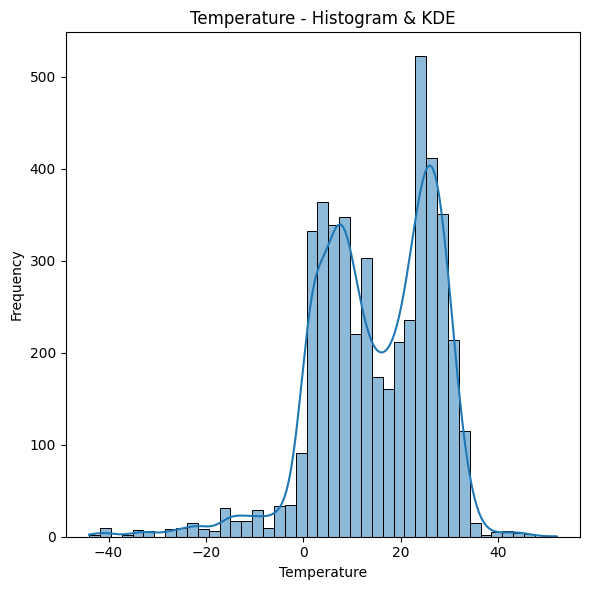

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

sns.histplot(df["Temperature"], kde=True)

plt.title("Temperature - Histogram & KDE")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


    The temperature distribution is bimodal, indicating the presence of multiple climate zones such as cool and warm regions within the dataset.
    
    Most observations are concentrated between 0°C and 30°C, representing commonly experienced and travel-friendly weather conditions.
    
    Extreme temperatures below −30°C and above 40°C appear as outliers, reflecting rare but influential climatic extremes.

# Hour - Histogram & KDE

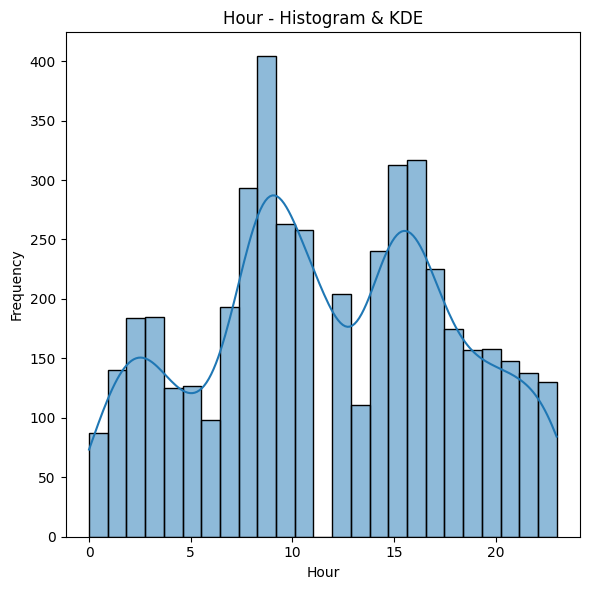

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))

sns.histplot(df["Hour"], kde=True)

plt.title("Hour - Histogram & KDE")
plt.xlabel("Hour")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


The hour distribution shows multiple peaks, indicating higher data collection frequency during specific time periods rather than uniformly across all hours.

Midday and evening hours have greater concentration, suggesting these periods are more actively recorded or operationally significant.

The non-uniform KDE pattern confirms that the hour variable follows a non-normal, time-dependent distribution.

# Temperature - Box plot Hour- BoxPlot

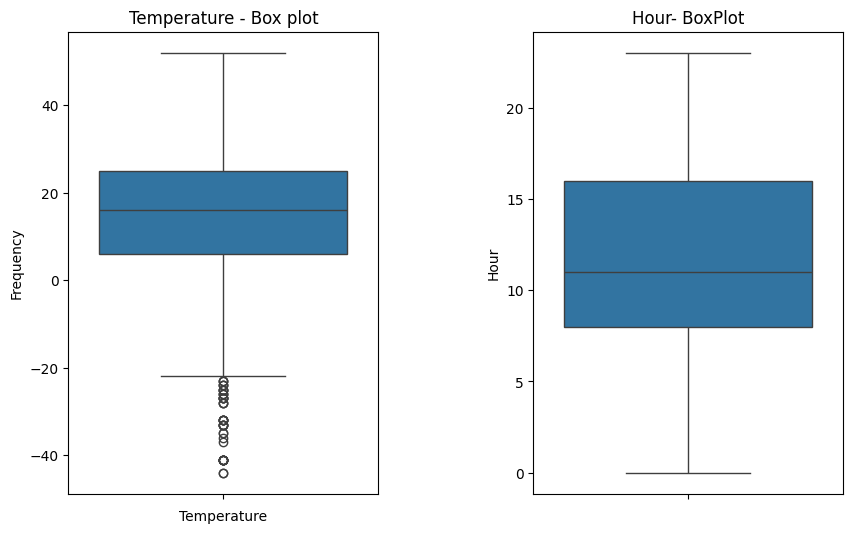

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)

sns.boxplot(data=df["Temperature"])

plt.title("Temperature - Box plot")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
sns.boxplot(data=df["Hour"])
plt.title("Hour- BoxPlot")
plt.subplots_adjust(wspace=0.5)
#plt.tight_layout()
plt.show()

**Temperature Box Plot**

The median temperature lies around the mid-teens (°C), indicating generally moderate climatic conditions across cities.

The wide interquartile range (IQR) shows high variability in temperatures, reflecting diverse geographic and climatic regions.

Several lower-end outliers (below −30°C) highlight the presence of extreme cold locations, which significantly increase data spread.

**Hour Box Plot**

The median hour is around midday (≈11–12), suggesting that observations are evenly spread across the day.

The relatively symmetric IQR indicates balanced temporal coverage without strong time-based bias.

The full range from 0 to 23 hours confirms that data was collected throughout the entire day.

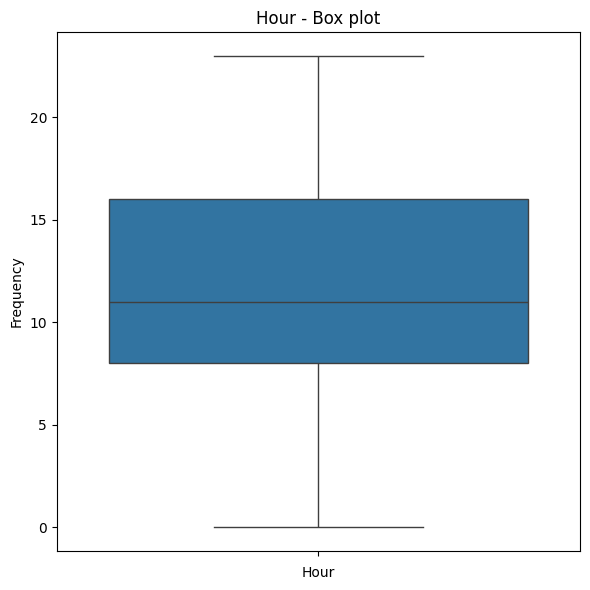

In [20]:
plt.figure(figsize=(6, 6))

sns.boxplot(data=df["Hour"])

plt.title("Hour - Box plot")
plt.xlabel("Hour")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# For Outliers

In [21]:
for col in df.select_dtypes(include=[int, float]):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    ub = q3 + 1.5 * iqr
    lb = q1 - 1.5 * iqr

    outliers = df[(df[col] > ub) | (df[col] < lb)]
    
    print(f"{col} - Number of outliers: {outliers.shape[0]}")
    print(outliers)

Temperature - Number of outliers: 47
              Country         Cities       Day      Time        Date  \
4095           Russia          Pevek    Friday  10:20:00  16-01-2026   
4097  Solomon Islands        Honiara  Saturday  03:20:00  17-01-2026   
4117        Indonesia      Pontianak  Saturday  03:20:00  17-01-2026   
4118    United States      Anchorage    Friday  08:20:00  16-01-2026   
4121           Turkey         Ankara    Friday  23:20:00  16-01-2026   
4149          Czechia         Prague    Friday  20:20:00  16-01-2026   
4182       Azerbaijan           Baku    Friday  09:20:00  16-01-2026   
4265      Switzerland           Bern    Friday  10:20:00  16-01-2026   
4445    United States        Chicago    Friday  20:20:00  16-01-2026   
4457           Taiwan         Taipei    Friday  10:20:00  16-01-2026   
4469       Uzbekistan       Tashkent  Saturday  00:20:00  17-01-2026   
4570             Oman         Muscat    Friday  23:20:00  16-01-2026   
4611    United States      

In [ ]:
df.info()

# Categorical Columns

In [22]:
cat_df=df.select_dtypes(include=["object"])
cat_df


,Country,Cities,Day,Time,Date,Time_Slot
0,United Arab Emirates,Abu Dhabi,Wednesday,17:29:00,14-01-2026,Evening
1,Nicaragua,Managua,Wednesday,07:29:00,14-01-2026,Morning
2,Ghana,Accra,Wednesday,13:29:00,14-01-2026,Afternoon
3,Bahrain,Manama,Wednesday,16:29:00,14-01-2026,Afternoon
4,Ethiopia,Addis Ababa,Wednesday,16:29:00,14-01-2026,Afternoon
...,...,...,...,...,...,...
5293,Croatia,Zagreb,Saturday,02:00:00,17-01-2026,Late Night
5294,Guatemala,Guatemala City,Saturday,03:00:00,17-01-2026,Late Night
5295,Spain,Palma,Saturday,08:00:00,17-01-2026,Morning
5296,Mozambique,Palma,Saturday,08:00:00,17-01-2026,Morning


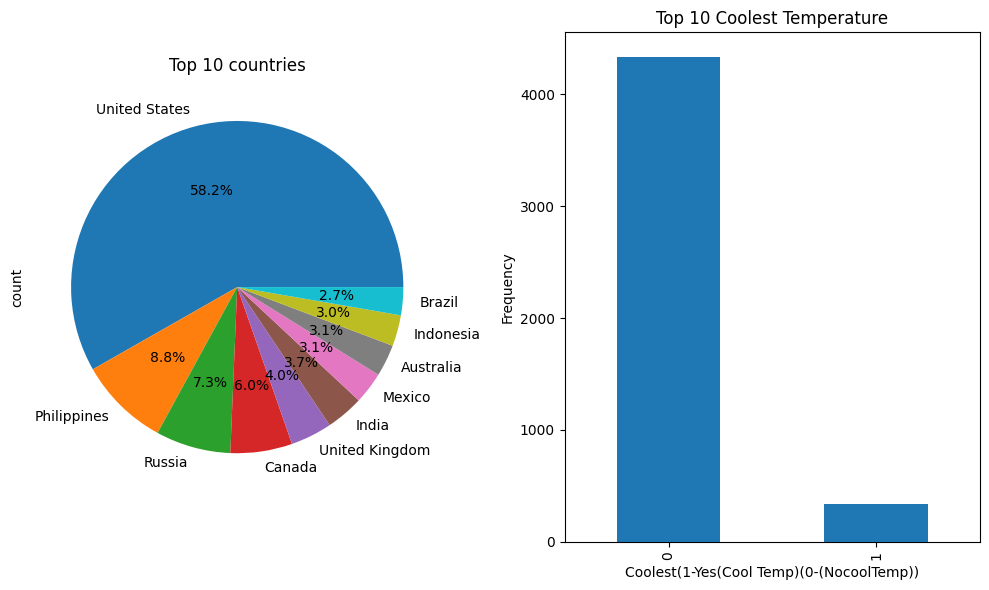

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
df["Country"].value_counts().head(10).plot(kind='pie',autopct="%1.1f%%")
plt.title("Top 10 countries")
plt.subplot(1,2,2)
df["Coolest"].value_counts().head(10).plot(kind='bar')
plt.subplot(1,2,2)
plt.title("Top 10 Coolest Temperature")
plt.xlabel("Coolest(1-Yes(Cool Temp)(0-(NocoolTemp))")
plt.ylabel("Frequency")
plt.tight_layout()  # for gap between charts

In [ ]:
df

In [ ]:
coolest_temp = df[df["Coolest"] == 1]
coolest_timeSlot = coolest_temp["Time_Slot"].value_counts()
coolest_timeSlot.plot(
    kind="bar",
    title="Coolest Time Slots",
    ylabel="Frequency",
    xlabel="Time Slot",
    rot=45
)


# Bi-Varaite Analaysis

# Category vs category

In [24]:
cat_col=df.select_dtypes(include=['object'])
cat_col

,Country,Cities,Day,Time,Date,Time_Slot
0,United Arab Emirates,Abu Dhabi,Wednesday,17:29:00,14-01-2026,Evening
1,Nicaragua,Managua,Wednesday,07:29:00,14-01-2026,Morning
2,Ghana,Accra,Wednesday,13:29:00,14-01-2026,Afternoon
3,Bahrain,Manama,Wednesday,16:29:00,14-01-2026,Afternoon
4,Ethiopia,Addis Ababa,Wednesday,16:29:00,14-01-2026,Afternoon
...,...,...,...,...,...,...
5293,Croatia,Zagreb,Saturday,02:00:00,17-01-2026,Late Night
5294,Guatemala,Guatemala City,Saturday,03:00:00,17-01-2026,Late Night
5295,Spain,Palma,Saturday,08:00:00,17-01-2026,Morning
5296,Mozambique,Palma,Saturday,08:00:00,17-01-2026,Morning


In [25]:
country_day=pd.crosstab(df["Country"], df["Day"]).sum()
country_day

Day
Friday       1251
Monday        573
Saturday      449
Sunday          6
Thursday      554
Tuesday       525
Wednesday    1315
dtype: int64

In [26]:
city_day=pd.crosstab(df["Cities"], df["Day"]).sum()
city_day

Day
Friday       1251
Monday        573
Saturday      449
Sunday          6
Thursday      554
Tuesday       525
Wednesday    1315
dtype: int64

# Stacked Bar Chart

Text(0, 0.5, 'Frequency of Days')

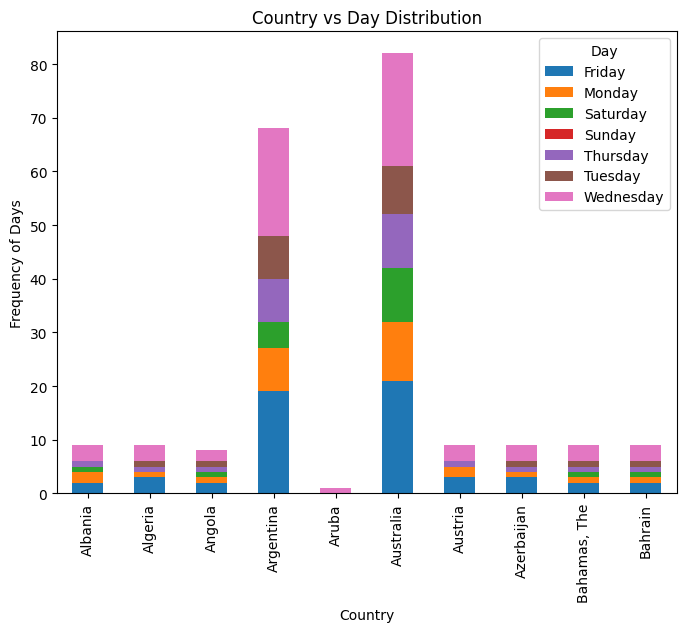

In [27]:
country_day=pd.crosstab(df["Country"],df["Day"]).head(10).plot(kind='bar',stacked=True,figsize=(8,6))
plt.title("Country vs Day Distribution")
plt.xlabel("Country")
plt.ylabel("Frequency of Days")


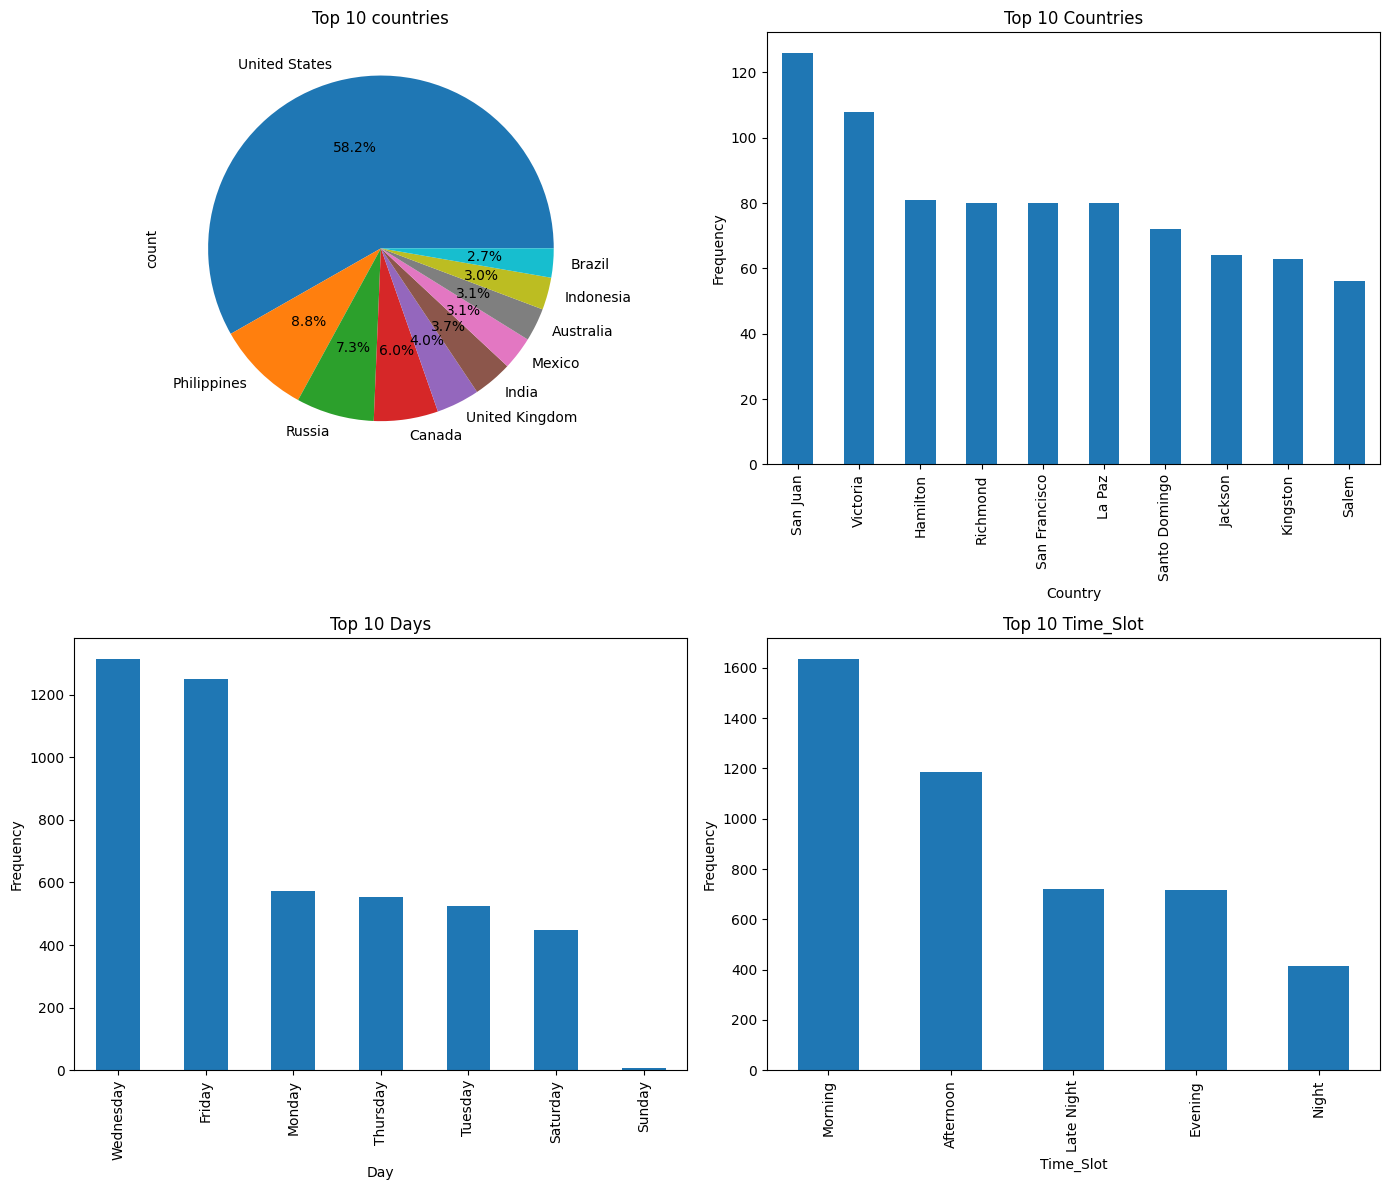

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
df["Country"].value_counts().head(10).plot(kind='pie',autopct="%1.1f%%")
plt.title("Top 10 countries")
plt.subplot(2,2,2)
df["Cities"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.subplot(2,2,3)
df["Day"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Days")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
df["Time_Slot"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Time_Slot")
plt.xlabel("Time_Slot")
plt.ylabel("Frequency")
plt.tight_layout()  # for gap betwe

# Category Vs Numerical

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


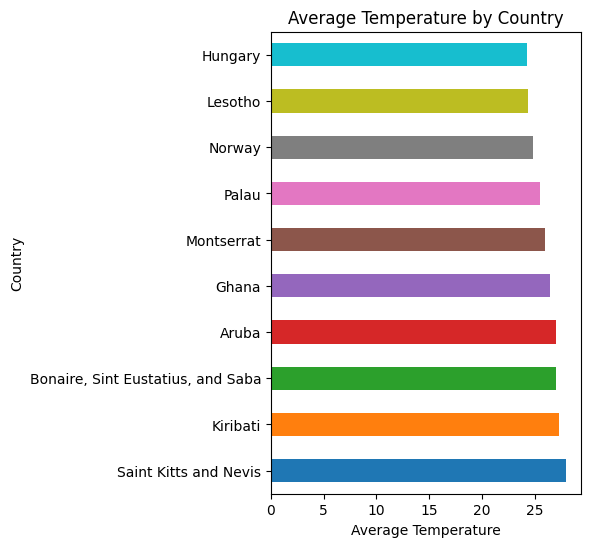

In [10]:
colors = sns.color_palette("tab10", 10)
avg_temp = (
    df.groupby("Country")["Temperature"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(4, 6))
avg_temp.plot(kind="barh",color=colors)
plt.title("Average Temperature by Country")
plt.xlabel("Average Temperature")
plt.ylabel("Country")
plt.show()


 **Saint Kitts** and **Nevis** shows the highest value, indicating the highest average temperature among the listed countries.
    
    Kiribati, Eustatius and Saba, and Aruba also record similarly high average temperatures, reflecting a consistent warm-climate pattern at the top.
    
    Average temperatures gradually decrease toward Hungary, suggesting only slight variation across countries rather than sharp differences.   

# Average_Temp country_wise

In [23]:
pivot = df.pivot_table(
    index="Country",
    values="Temperature",
    aggfunc="mean"
)
top10_avg_temp = (
    pivot
    .sort_values(by="Temperature", ascending=False)
    .head(10)
)

top10_avg_temp.style.set_caption("Prefered Normal Temperature Country")

,Temperature
Country,
Saint Kitts and Nevis,28.000000
Kiribati,27.333333
"Bonaire, Sint Eustatius, and Saba",27.000000
Aruba,27.000000
Ghana,26.444444
Montserrat,26.000000
Palau,25.555556
Norway,24.888889
Lesotho,24.428571


# Average_Temp City_wise

In [26]:
df.columns

Index(['Country', 'Cities', 'Day', 'Time', 'Date', 'Temperature', 'Hour',
       'Time_Slot', 'Coolest'],
      dtype='object')

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

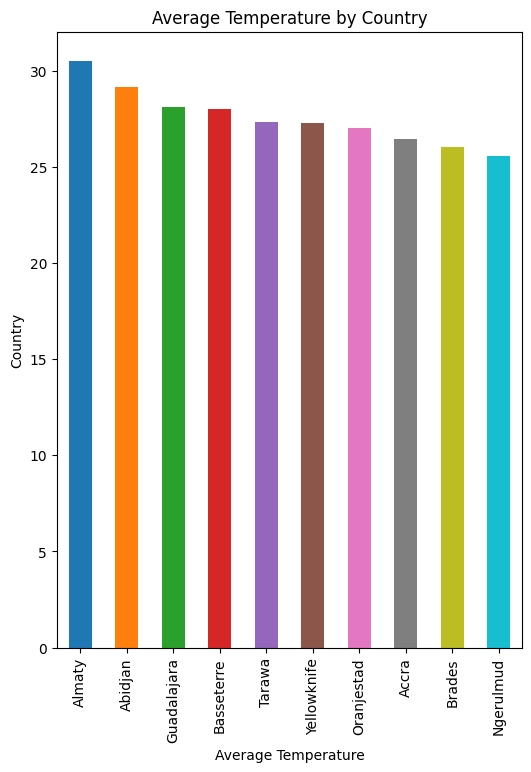

In [39]:
colors = sns.color_palette("tab10", 10)
avg_temp = (
    df.groupby("Cities")["Temperature"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(6, 8))
avg_temp.plot(kind="bar",color=colors)
plt.title("Average Temperature by Country")
plt.xlabel("Average Temperature")
plt.ylabel("Country")
plt.show()


Vaitape records the highest average temperature, making it the warmest location among the listed cities.

Dalian, Banjara, and Terre also show relatively high average temperatures, indicating consistently warm conditions across these locations.

Average temperatures gradually decline toward Morondava, reflecting moderate variation rather than extreme temperature differences among the cities.

In [27]:
pivot = df.pivot_table(
    index="Cities",
    values="Temperature",
    aggfunc="mean"
)
top10_avg_temp = (
    pivot
    .sort_values(by="Temperature", ascending=False)
    .head(10)
)

top10_avg_temp.style.set_caption("Prefered Normal Temperature Country")

,Temperature
Cities,
Almaty,30.500000
Abidjan,29.125000
Guadalajara,28.125000
Basseterre,28.000000
Tarawa,27.333333
Yellowknife,27.250000
Oranjestad,27.000000
Accra,26.444444
Brades,26.000000


# Average Temperature by Time Slot

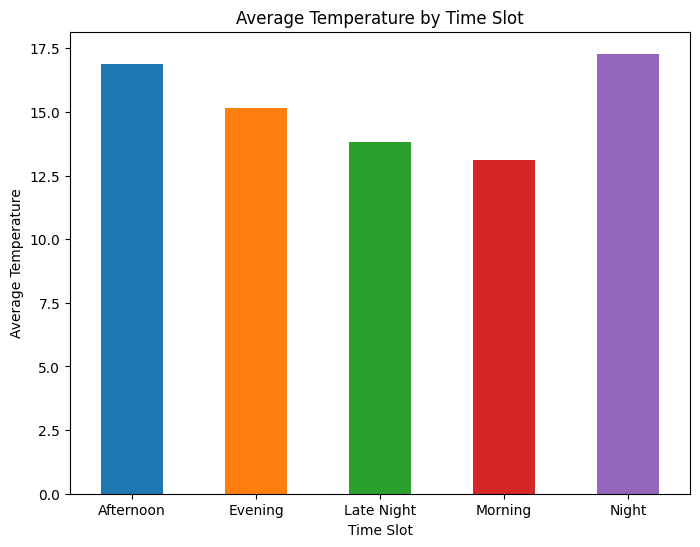

In [42]:
colors = sns.color_palette("tab10",5)
avg_temp = df.groupby("Time_Slot")["Temperature"].mean()

plt.figure(figsize=(8,6))
avg_temp.plot(kind="bar", color=colors)

plt.title("Average Temperature by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Average Temperature")
plt.xticks(rotation=0)
plt.show()


    Night and afternoon time slots record the highest average temperatures, indicating warmer conditions during these periods.
    
    Morning and late-night show comparatively lower average temperatures, reflecting natural daily cooling patterns.
    
    The clear variation across time slots highlights the influence of time of day on temperature, making it a useful feature for temporal analysis and modeling.

In [ ]:
avg_temp

# Coolest Countries count

<Axes: xlabel='Country'>

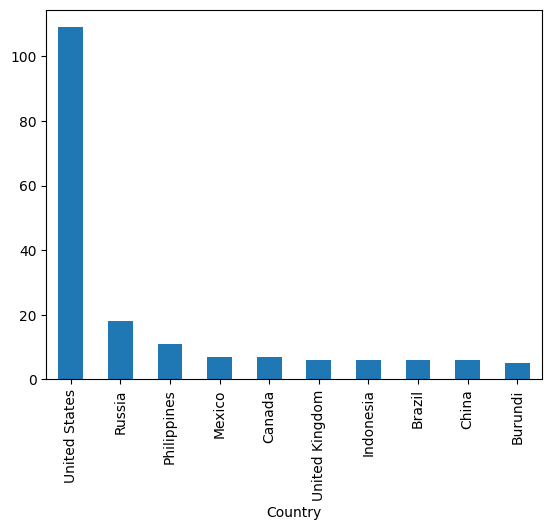

In [33]:
coolest_df = df[df["Coolest"] == 1]
coolest_counts = (
    coolest_df
    .groupby("Country")["Coolest"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
coolest_counts.plot(kind="bar")


     The United States records the highest number of coolest temperature occurrences, indicating frequent cold-condition observations compared to other countries.
    
    Russia and the Philippines follow with noticeably lower but still significant coolest temperature counts, reflecting regional climatic variation and data presence.
    
    The sharp decline across remaining countries highlights uneven distribution of coolest temperature events, influenced by geography, climate zones, and data coverage.

# Coolest Cities

<Axes: xlabel='Cities'>

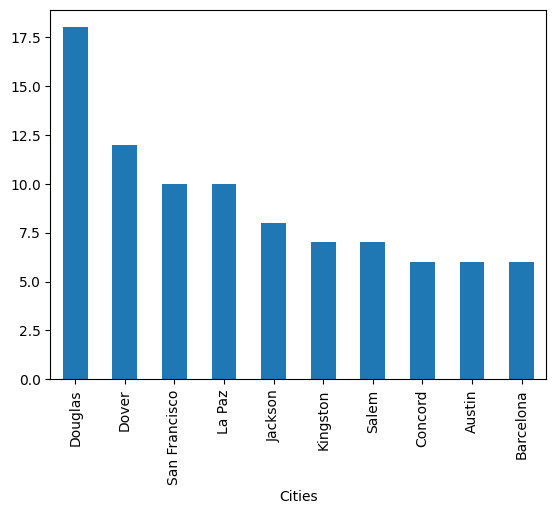

In [34]:
coolest_df = df[df["Coolest"] == 1]
coolest_counts = (
    coolest_df
    .groupby("Cities")["Coolest"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
coolest_counts.plot(kind="bar")



    Dover, San Francisco, and La Paz also show relatively high coolest temperature counts, suggesting regular occurrences of cooler temperature conditions in these locations.
    
    The declining counts across the remaining cities reflect variations in cool-temperature frequency, influenced by differences in local climate patterns and geographic conditions.

# Numerical Vs Numerical

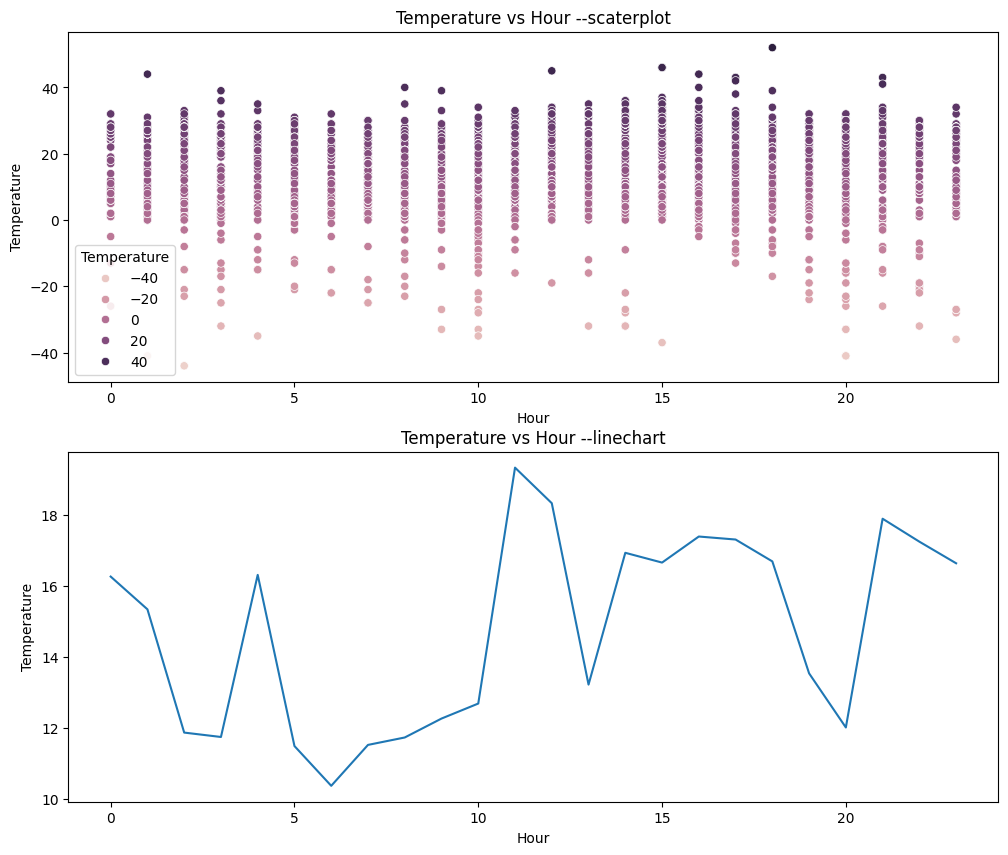

In [48]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
fig, axes = plt.subplots(2, 1, figsize=(12,10))
sns.scatterplot(data=df,x="Hour",y="Temperature",hue="Temperature",ax=axes[0])
axes[0].set_title("Temperature vs Hour --scaterplot")
axes[0].legend(title="Temperature", loc="lower left")

#corr=df[["Temperature","Hour"]]
sns.lineplot(data=df,x="Hour",y="Temperature",ci=None)
axes[1].set_title("Temperature vs Hour --linechart")

plt.subplots_adjust(wspace=0.5)
plt.show()

# Line chart for Temperatue and Hour

C:\Users\prash\AppData\Local\Temp\ipykernel_14836\1728687866.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x="Hour",y="Temperature",ci=None)


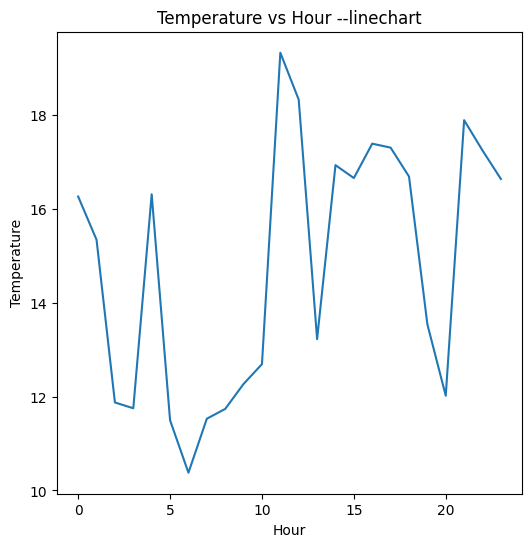

In [12]:
plt.figure(figsize=(6,6))
sns.lineplot(data=df,x="Hour",y="Temperature",ci=None)
plt.title("Temperature vs Hour --linechart")
plt.show()

The line chart shows clear hourly fluctuations in temperature, indicating noticeable variation throughout the day rather than a steady trend.

Peak temperatures occur around the mid-to-late hours, while lower temperatures appear in the early hours, reflecting a typical daily temperature cycle.

The sharp rises and dips suggest short-term temperature changes, possibly influenced by local weather conditions or time-of-day effects.

# Numerical vs Numerical Correlation

In [ ]:
df.columns

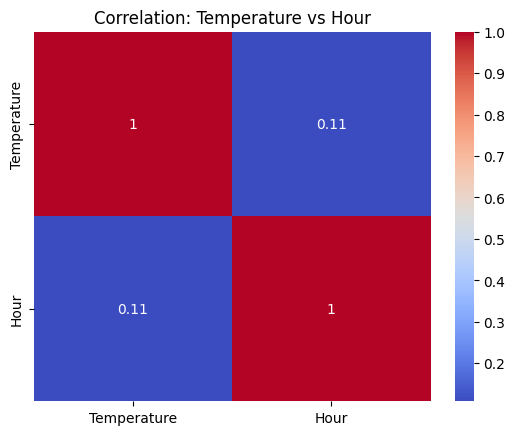

In [36]:
corr = df[["Temperature", "Hour"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation: Temperature vs Hour")
plt.show()


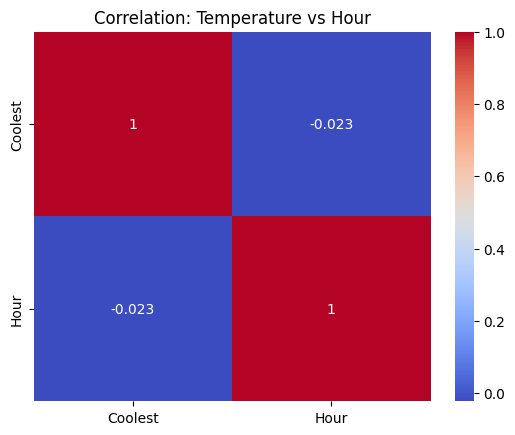

In [37]:
corr = df[["Coolest", "Hour"]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation: Temperature vs Hour")
plt.show()

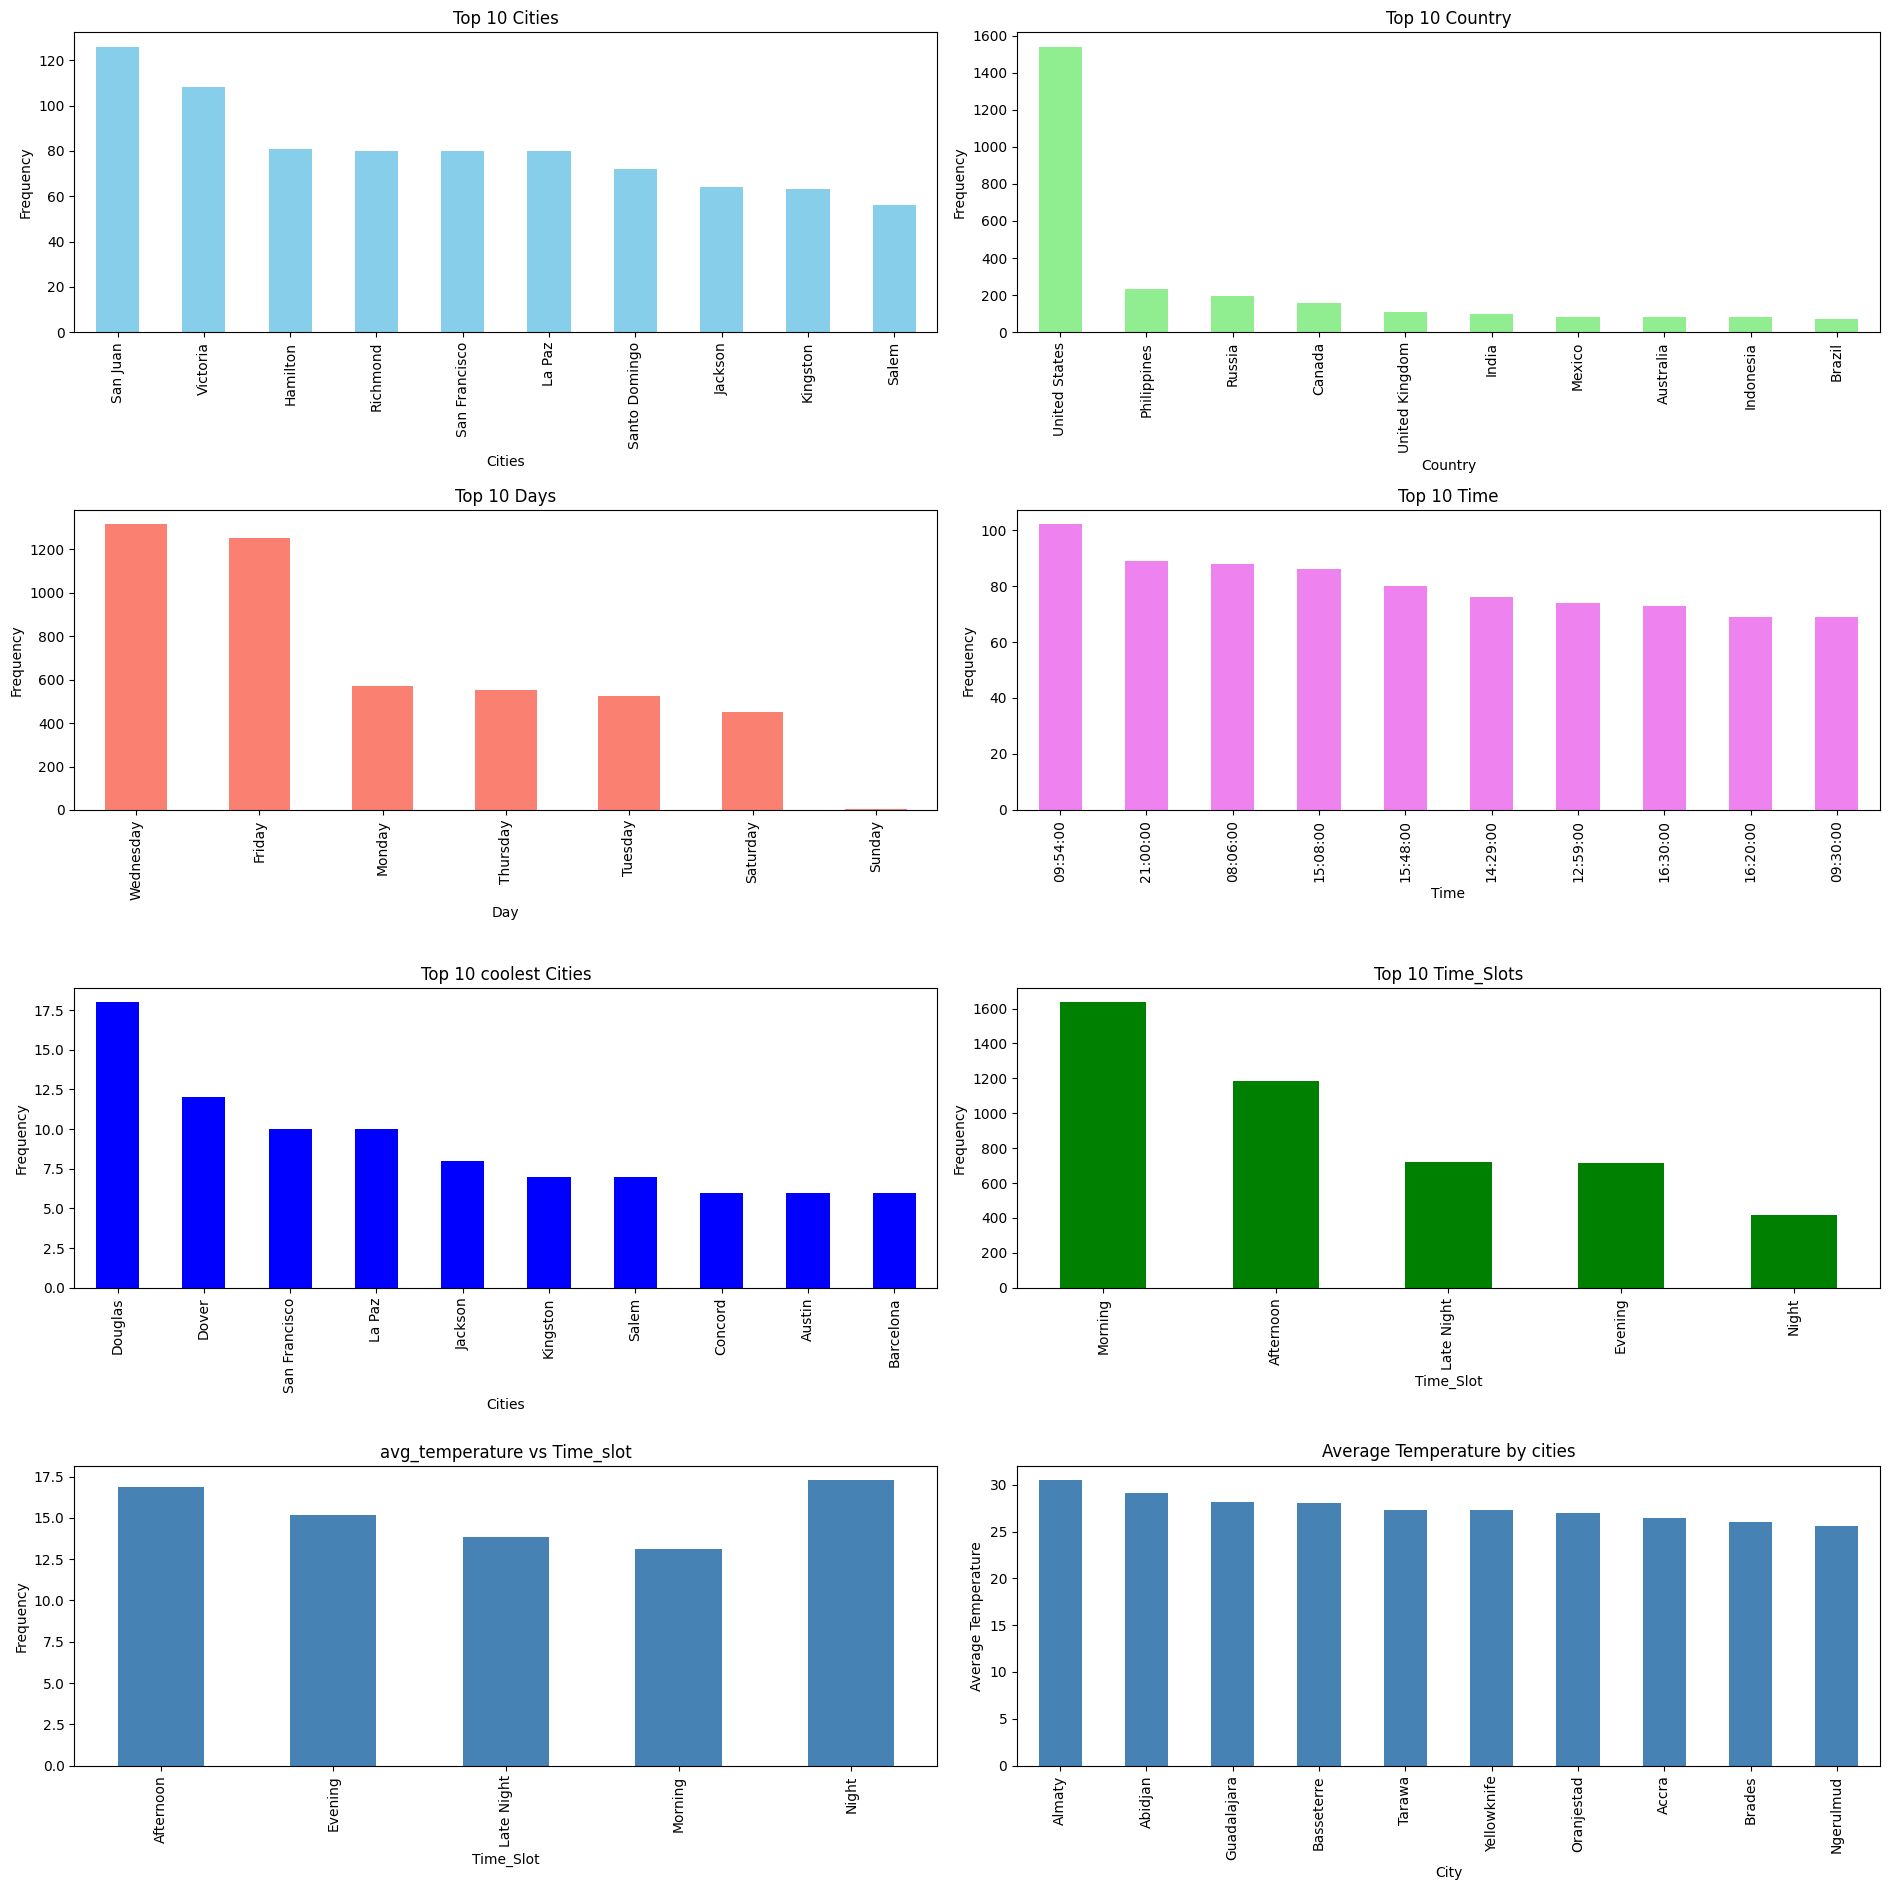

In [38]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 2, figsize=(19, 19))

df['Cities'].value_counts().head(10).plot(kind='bar', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Top 10 Cities')
axes[0,0].set_ylabel("Frequency")



avg_temp = df.groupby("Time_Slot")["Temperature"].mean()
avg_temp.plot(kind="bar", color="steelblue",ax=axes[3,0])
axes[3,0].set_title('avg_temperature vs Time_slot')
axes[3,0].set_ylabel("Frequency")

avg_city_temp = (
    df.groupby("Cities")["Temperature"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)
avg_city_temp.plot(
    kind="bar",
    color="steelblue",
    ax=axes[3, 1]
)

axes[3, 1].set_title("Average Temperature by cities")
axes[3, 1].set_xlabel("City")
axes[3, 1].set_ylabel("Average Temperature")

df['Country'].value_counts().head(10).plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Top 10 Country')
axes[0,1].set_ylabel("Frequency")

df['Day'].value_counts().head(10).plot(kind='bar', ax=axes[1,0], color='salmon')
axes[1,0].set_title('Top 10 Days')
axes[1,0].set_ylabel("Frequency")


df['Time'].value_counts().head(10).plot(kind='bar', ax=axes[1,1], color='violet')
axes[1,1].set_title('Top 10 Time')
axes[1,1].set_ylabel("Frequency")


df[df["Coolest"] == 1].groupby("Cities").size().sort_values(ascending=False).head(10).plot(kind="bar", ax=axes[2, 0], color="blue")
axes[2,0].set_title('Top 10 coolest Cities')
axes[2,0].set_ylabel("Frequency")


df['Time_Slot'].value_counts().head(10).plot(kind='bar', ax=axes[2,1], color='green')
axes[2,1].set_title('Top 10 Time_Slots')
axes[2,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# the coolest cities 

In [40]:
cool_city=df[df["Temperature"]<=0]

In [41]:
cool_city

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
68,Kyrgyzstan,Bishkek,Wednesday,19:29:00,14-01-2026,0,19,Evening,1
209,Estonia,Tallinn,Wednesday,14:29:00,14-01-2026,0,14,Afternoon,1
335,United States,Phoenix,Monday,03:54:00,12-01-2026,0,3,Late Night,1
404,Israel,Jerusalem,Monday,03:54:00,12-01-2026,0,3,Late Night,1
429,Pakistan,Karachi,Monday,03:54:00,12-01-2026,0,3,Late Night,1
...,...,...,...,...,...,...,...,...,...
5283,United Kingdom,Glasgow,Saturday,14:00:00,17-01-2026,-32,14,Afternoon,1
5284,United States,Glasgow,Saturday,14:00:00,17-01-2026,-32,14,Afternoon,1
5285,United States,Glasgow,Saturday,14:00:00,17-01-2026,-32,14,Afternoon,1
5293,Croatia,Zagreb,Saturday,02:00:00,17-01-2026,-23,2,Late Night,1


# cold cities

In [42]:
cold_city=df[(df["Temperature"]>=1 )& (df["Temperature"]<=10)]

In [43]:
cold_city

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
10,Jordan,Amman,Wednesday,16:29:00,14-01-2026,9,16,Afternoon,0
12,Netherlands,Amsterdam,Wednesday,14:29:00,14-01-2026,7,14,Afternoon,0
13,United States,Amsterdam,Wednesday,14:29:00,14-01-2026,7,14,Afternoon,0
15,Turkey,Ankara,Wednesday,16:29:00,14-01-2026,2,16,Afternoon,0
24,Russia,Moscow,Wednesday,16:29:00,14-01-2026,4,16,Afternoon,0
...,...,...,...,...,...,...,...,...,...
5232,United Kingdom,Edmonton,Friday,21:00:00,16-01-2026,6,21,Night,0
5236,Russia,Vladivostok,Friday,21:00:00,16-01-2026,3,21,Night,0
5265,Côte d’Ivoire,Yamoussoukro,Friday,17:00:00,16-01-2026,2,17,Evening,0
5274,United States,Orlando,Saturday,09:00:00,17-01-2026,4,9,Morning,0


# Mild Cities

In [44]:
Mild_city=df[(df["Temperature"]>=11 )& (df["Temperature"]<=20)]
Mild_city

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
6,Algeria,Algiers,Wednesday,14:29:00,14-01-2026,19,14,Afternoon,0
14,Mexico,Mexico City,Wednesday,07:29:00,14-01-2026,11,7,Morning,0
16,Belarus,Minsk,Wednesday,16:29:00,14-01-2026,14,16,Afternoon,0
21,Turkmenistan,Ashgabat,Wednesday,18:29:00,14-01-2026,15,18,Evening,0
28,Greece,Athens,Wednesday,15:29:00,14-01-2026,15,15,Afternoon,0
...,...,...,...,...,...,...,...,...,...
5234,Lithuania,Vilnius,Saturday,03:00:00,17-01-2026,20,3,Late Night,0
5241,United States,Eureka,Saturday,12:00:00,17-01-2026,16,12,Afternoon,0
5242,United States,Eureka,Saturday,12:00:00,17-01-2026,16,12,Afternoon,0
5253,Germany,Frankfurt,Saturday,11:00:00,17-01-2026,15,11,Morning,0


# Warm and Comfortable

In [45]:
Warm_city=df[(df["Temperature"]>=21 )& (df["Temperature"]<=30)]
Warm_city

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
0,United Arab Emirates,Abu Dhabi,Wednesday,17:29:00,14-01-2026,27,17,Evening,0
1,Nicaragua,Managua,Wednesday,07:29:00,14-01-2026,23,7,Morning,0
3,Bahrain,Manama,Wednesday,16:29:00,14-01-2026,22,16,Afternoon,0
4,Ethiopia,Addis Ababa,Wednesday,16:29:00,14-01-2026,23,16,Afternoon,0
5,Philippines,Manila,Wednesday,21:29:00,14-01-2026,26,21,Night,0
...,...,...,...,...,...,...,...,...,...
5290,Mexico,Guadalajara,Saturday,04:00:00,17-01-2026,28,4,Late Night,0
5291,Spain,Guadalajara,Saturday,04:00:00,17-01-2026,28,4,Late Night,0
5294,Guatemala,Guatemala City,Saturday,03:00:00,17-01-2026,23,3,Late Night,0
5295,Spain,Palma,Saturday,08:00:00,17-01-2026,25,8,Morning,0


# hot Cities

In [46]:
hot_city=df[(df["Temperature"]>=31 )& (df["Temperature"]<=41)]
hot_city

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
2,Ghana,Accra,Wednesday,13:29:00,14-01-2026,31,13,Afternoon,0
37,Mali,Bamako,Wednesday,13:29:00,14-01-2026,35,13,Afternoon,0
43,Central African Republic,Bangui,Wednesday,14:29:00,14-01-2026,36,14,Afternoon,0
44,Philippines,Bangui,Wednesday,14:29:00,14-01-2026,36,14,Afternoon,0
45,Niger,Niamey,Wednesday,14:29:00,14-01-2026,32,14,Afternoon,0
...,...,...,...,...,...,...,...,...,...
5086,Kiribati,Tarawa,Friday,21:00:00,16-01-2026,33,21,Night,0
5114,United States,Miami,Friday,19:00:00,16-01-2026,32,19,Evening,0
5115,United States,Miami,Friday,19:00:00,16-01-2026,32,19,Evening,0
5264,United States,Oklahoma City,Saturday,03:00:00,17-01-2026,36,3,Late Night,0


# Very_hot_cities

In [47]:
Veryhot_city=df[df["Temperature"]>=41]
Veryhot_city

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
456,Spain,Barcelona,Monday,15:54:00,12-01-2026,46,15,Afternoon,0
457,Venezuela,Barcelona,Monday,15:54:00,12-01-2026,46,15,Afternoon,0
458,Philippines,Barcelona,Monday,15:54:00,12-01-2026,46,15,Afternoon,0
850,Palau,Ngerulmud,Monday,18:54:00,12-01-2026,52,18,Evening,0
895,United Kingdom,Glasgow,Monday,17:54:00,12-01-2026,43,17,Evening,0
896,United States,Glasgow,Monday,17:54:00,12-01-2026,43,17,Evening,0
897,United States,Glasgow,Monday,17:54:00,12-01-2026,43,17,Evening,0
1394,India,Delhi,Tuesday,16:06:00,13-01-2026,44,16,Afternoon,0
1395,United States,Delhi,Tuesday,16:06:00,13-01-2026,44,16,Afternoon,0
1480,Palau,Ngerulmud,Tuesday,17:06:00,13-01-2026,42,17,Evening,0


# desire temperature 

In [48]:
desire_temp=df[(df["Temperature"]>=18 )& (df["Temperature"]<=28)]
desire_temp

,Country,Cities,Day,Time,Date,Temperature,Hour,Time_Slot,Coolest
0,United Arab Emirates,Abu Dhabi,Wednesday,17:29:00,14-01-2026,27,17,Evening,0
1,Nicaragua,Managua,Wednesday,07:29:00,14-01-2026,23,7,Morning,0
3,Bahrain,Manama,Wednesday,16:29:00,14-01-2026,22,16,Afternoon,0
4,Ethiopia,Addis Ababa,Wednesday,16:29:00,14-01-2026,23,16,Afternoon,0
5,Philippines,Manila,Wednesday,21:29:00,14-01-2026,26,21,Night,0
...,...,...,...,...,...,...,...,...,...
5290,Mexico,Guadalajara,Saturday,04:00:00,17-01-2026,28,4,Late Night,0
5291,Spain,Guadalajara,Saturday,04:00:00,17-01-2026,28,4,Late Night,0
5294,Guatemala,Guatemala City,Saturday,03:00:00,17-01-2026,23,3,Late Night,0
5295,Spain,Palma,Saturday,08:00:00,17-01-2026,25,8,Morning,0


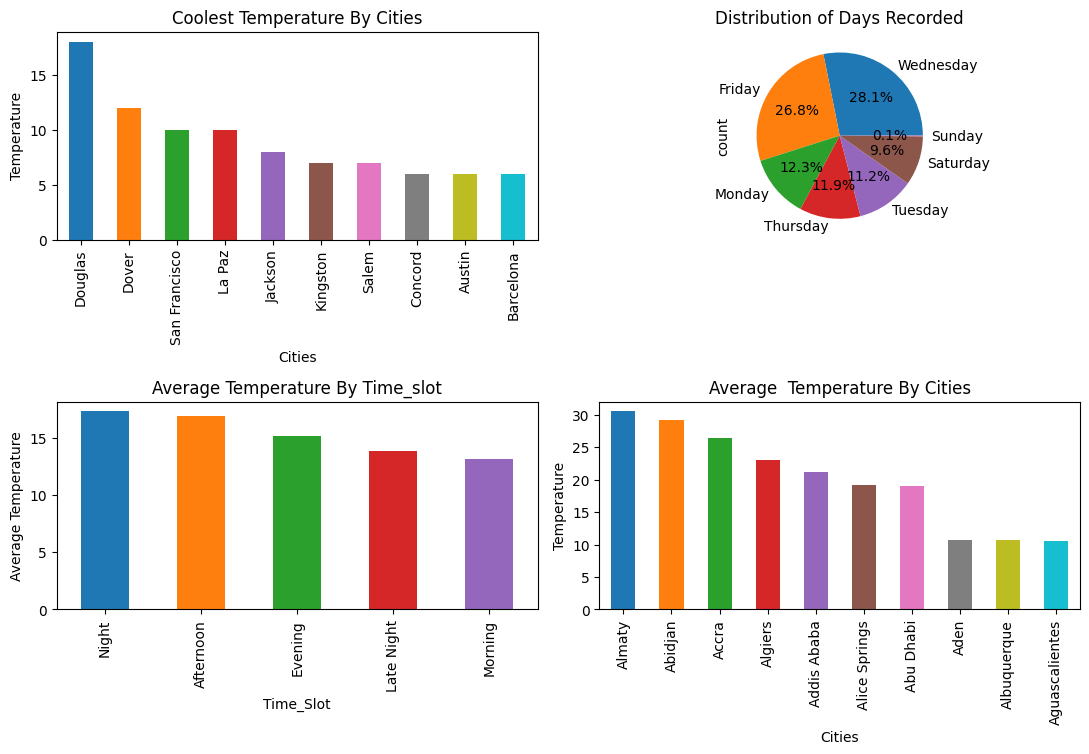

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(11,10))
plt.subplot(321)
colors=sns.color_palette("tab10",10)
df[df["Coolest"] == 1].groupby("Cities").size().sort_values(ascending=False).head(10).plot(kind="bar", color=colors)
plt.title("Coolest Temperature By Cities")
plt.ylabel("Temperature")
plt.tight_layout()
plt.subplot(322)
plt.title("Distribution of Days Recorded")
df["Day"].value_counts().head(10).plot(kind='pie',autopct="%1.1f%%")
plt.subplot(323)
colors=sns.color_palette("tab10",5)
df.groupby("Time_Slot")["Temperature"].mean().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title("Average Temperature By Time_slot")
plt.ylabel("Average Temperature")
plt.tight_layout()
plt.subplot(324)
colors=sns.color_palette("tab10",10)
plt.title("Average  Temperature By Cities")
plt.ylabel("Temperature")
df.groupby("Cities")["Temperature"].mean().head(10).sort_values(ascending=False).plot(kind='bar',color=colors)
plt.tight_layout()

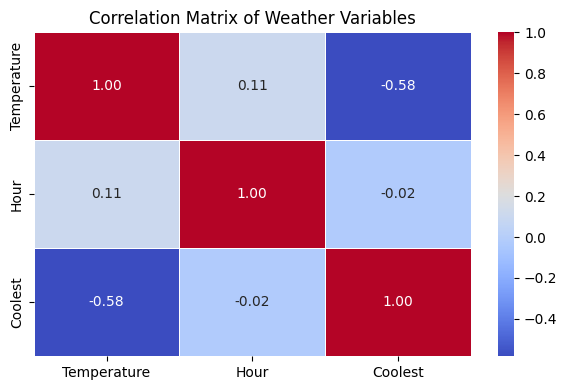

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate correlation matrix
corr_matrix = df[['Temperature', 'Hour', 'Coolest']].corr()

# plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5
)

plt.title("Correlation Matrix of Weather Variables")
plt.tight_layout()
plt.show()


# **WHY hypothesis comes AFTER visualization?**
    
    Because visuals tell us what looks true
    Statistics tell us whether it is actually true.

# Hypothesis Testing

# Time Slot vs Temperature

    Null Hypothesis (H₀):
    There is no significant difference in average temperature across different time slots (Morning, Afternoon, Evening, Night).
    
    Alternative Hypothesis (H₁):
    There is a significant difference in average temperature across different time slots.

In [57]:
from scipy.stats import f_oneway
groups=[df[df["Time_Slot"]==slot]["Temperature"]
        for slot in df["Time_Slot"].unique()]
f_stat,p_value=f_oneway(*groups)
alpha=0.05
#print("f_stats",f_stat)
#print("p_value",p_value)
if  p_value<alpha:
    print("We Reject Null Hypothesis i.e.There is a significant difference in average temperature across time_slots ")
    if  p_value<alpha:
        print("H1 is accepted There is a significant difference in average temperature across different time slots.")
else:
    print("failed to Reject  Null Hypothesis i.e.There is a no significant difference in average temperature across time_slots ")


We Reject Null Hypothesis i.e.There is a significant difference in average temperature across time_slots 
H1 is accepted There is a significant difference in average temperature across different time slots.


# Country-wise Temperature Difference

     Null Hypothesis (H₀):
    There is no significant difference in average temperature between countries.
    
    Alternative Hypothesis (H₁):
    Average temperature differs significantly between countries.

In [56]:
from scipy.stats import f_oneway
groups=[df[df["Country"]==slot]["Temperature"]
        for slot in df["Country"].unique()]
f_stat,p_value=f_oneway(*groups)
alpha=0.05
print("f_stats",f_stat)
print("p_value",p_value)
if  p_value<alpha:
    print("We Reject Null Hypothesis i.e.There is a significant difference in average temperature across Countries ")
    if  p_value<alpha:
        print("H1 is accepted Average temperature differs significantly between countries..")
else:
    print("failed to Reject  Null Hypothesis i.e.There is a no significant difference in average temperature across Countries ")


f_stats 1.6051285334513652
p_value 9.017963988060475e-07
We Reject Null Hypothesis i.e.There is a significant difference in average temperature across Countries 
H1 is accepted Average temperature differs significantly between countries..


In [15]:
from scipy.stats import f_oneway
groups=[df[df["Cities"]==slot]["Temperature"]
        for slot in df["Cities"].unique()]
f_stat,p_value=f_oneway(*groups)
alpha=0.05
print("f_stats",f_stat)
print("p_value",p_value)
if  p_value<alpha:
    print("We Reject Null Hypothesis i.e.There is a significant difference in average temperature across Cities ")
    if  p_value<alpha:
        print("H1 is accepted Average temperature differs significantly between Cities..")
else:
    print("failed to Reject  Null Hypothesis i.e.There is a no significant difference in average temperature across Cities ")


f_stats 2.818334974303432
p_value 1.6272175649892444e-51
We Reject Null Hypothesis i.e.There is a significant difference in average temperature across Cities 
H1 is accepted Average temperature differs significantly between Cities..


# Day vs Temperature
    

    Null Hypothesis (H₀):
    Average temperature does not vary significantly across different days of the week.
    
    Alternative Hypothesis (H₁):
    Average temperature varies significantly across different days of the week.

In [55]:
from scipy.stats import f_oneway
groups=[df[df["Day"]==slot]["Temperature"]
       for slot in df["Day"].unique()]
f_value,p_value=f_oneway(*groups)
alpha=0.05
print("f_value",f_value)
print("p_value",p_value)
if p_value<alpha:
    print("We Reject Null Hypothesis i.e.There is a significant difference in average temperature across Countries ")
    if  p_value<alpha:
        print("H1 is accepted Average temperature varies significantly across different days of the week.")
else:
    print("failed to Reject  Null Hypothesis i.e.There is a no significant difference in average temperature across Countries ")






f_value 20.71640699136172
p_value 4.362323395129237e-24
We Reject Null Hypothesis i.e.There is a significant difference in average temperature across Countries 
H1 is accepted Average temperature varies significantly across different days of the week.


# Hourly Temperature Trend

    Null Hypothesis (H₀):
    There is no relationship between hour of the day and temperature.
    
    Alternative Hypothesis (H₁):
    There is a significant relationship between hour of the day and temperature.
    
    

In [54]:
from scipy.stats import f_oneway
groups=[df[df["Hour"]==slot]["Temperature"]
        for slot in df["Hour"].unique() ]
f_value,p_value=f_oneway(*groups)
alpha=0.05
print("f_value",f_value)
print("p_value",p_value)
if p_value<alpha:
    print("We Reject Null Hypothesis i.e.There is a significant relationship between hour of day and temperature")
    if  p_value<alpha:
        print("H1 is accepted There is a significant relationship between hour of the day and temperature.")
else:
    print("failed to Reject  Null Hypothesis i.e.There is a no  significant relationship in average temperature across Countries ")
    


f_value 10.457000715977546
p_value 4.633306175793463e-37
We Reject Null Hypothesis i.e.There is a significant relationship between hour of day and temperature
H1 is accepted There is a significant relationship between hour of the day and temperature.


# Night vs Day Temperature

    Null Hypothesis (H₀):
    Night-time temperatures are not significantly lower than daytime temperatures.
    
    Alternative Hypothesis (H₁):
    Night-time temperatures are significantly lower than daytime temperatures.

In [49]:
day_temp = df[df["Time_Slot"].isin(["Morning", "Afternoon"])]["Temperature"]
night_temp = df[df["Time_Slot"] == "Night"]["Temperature"]


In [51]:
from scipy.stats import ttest_ind
t_stat,p_value=ttest_ind(day_temp,night_temp,equal_var=False)
print("t_test",t_stat)
print("p_value",p_value)
alpha=0.05
if p_value<alpha :
    print("we reject Null Hypothesis i.e.Night-time temperatures are significantly lower than daytime temperatures.")
    if  p_value<alpha:
        print("H1 is accepted Night-time temperatures are significantly lower than daytime temperatures.")
    
else:
    print("failed to reject Null Hypothesis i.e.Night-time temperatures are not significantly lower than daytime temperatures. ")

t_test -4.088302543191802
p_value 5.018874307361858e-05
we reject Null Hypothesis i.e.Night-time temperatures are significantly lower than daytime temperatures.
H1 is accepted Night-time temperatures are significantly lower than daytime temperatures.


In [ ]:
df

In [ ]:
print(len(day_temp),len(night_temp))

# Create a new column Day_night

In [52]:
df["Day_Night"] = df["Time_Slot"].apply(
    lambda x: "Night" if x == "Night" else "Day"
)
contingency = pd.crosstab(df["Day_Night"], df["Coolest"])
contingency

Coolest,0,1
Day_Night,,
Day,3950,307
Night,387,29


# Coolest Temperatures Occurrence

    Null Hypothesis (H₀):
    Coolest temperatures (≤ 0°C) occur randomly across time slots.
    Alternative Hypothesis (H₁):
    Coolest temperatures occur more frequently during night or early morning.

In [53]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency)

print("Chi-square:", chi2)
print("p_value:", p_value)
if p_value<0.05:
    print("We Reject Null Hypothesis i.e.Coolest temperatures (≤ 0°C) occur randomly across time slots.")
    if  p_value<alpha:
        print("H1 is accepted Coolest temperatures occur more frequently during night or early morning.")
else:
     print("Failed to  Reject Null Hypothesis i.e.Coolest temperatures  occur more frequently during night or early morning..")


Chi-square: 0.00669272218225212
p_value: 0.9347985519517223
Failed to  Reject Null Hypothesis i.e.Coolest temperatures  occur more frequently during night or early morning..


In [ ]:
df

# ⇒ What I Observed

    Temperature varies significantly across countries, days, and time slots
    
    Afternoon time slots generally show higher temperatures
    
    Night and early morning time slots show cooler and sometimes extreme cold temperatures
    
    A small number of locations record very low temperatures (≤ 0°C), which pull the overall average down
    
    Mean temperature is affected by extreme cold and hot values
    
    Median temperature better represents typical travel conditions

# ⇒ Interpretation
    
    Most destinations fall within a moderate and comfortable temperature range
    
    Extreme cold temperatures are not common but have a strong impact on averages
    
    Time of day plays a critical role in perceived temperature comfort
    
    Relying only on overall average temperature can be misleading

# Business Insight for Traveler

    Extreme temperatures should not drive travel decisions
    
    Travelers should focus on median temperature ranges, not rare extremes
    
    Choosing travel times based on daytime temperature improves comfort
    
    Afternoon temperatures may feel warmer, while night travel may require precautions

# Business Insight for Travel Platforms

    Destination recommendations should be time-aware, not just location-based
    
    Highlight best time slots for comfortable travel conditions
    
    Use time-slot-based temperature insights instead of daily averages
    
    Provide personalized suggestions based on temperature preference ranges (18°C–28°C)

# Final Conclusion

    Temperature patterns are not random and vary significantly by time and location
    
    Time-based analysis provides more accurate travel insights
    
    The project converts fragmented weather data into actionable decision support

# My Suggestion for Traveller

If you love warm, beach-friendly weather, places like Saint Kitts and Nevis, Aruba, Kiribati, and Basseterre are great choices. The temperature stays comfortably warm, perfect for relaxing, swimming, and outdoor activities.

If you enjoy a bit more heat and lively city vibes, destinations such as Almaty, Abidjan, and Guadalajara offer sunny days that are ideal for exploring markets, culture, and local food.

If you prefer a milder and more comfortable climate, countries like Norway, Hungary, and Lesotho are better options, making sightseeing and long walks more enjoyable without feeling too hot.

 Overall, destinations with temperatures around 26–28°C strike the best balance for a relaxed and